# **Installs**

In [1]:
!pip install youtube_transcript_api -q
!pip install pytube -q
!pip install nnsplit -q
!pip install pysbd -q

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.6/57.6 kB 2.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 24.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.9/4.9 MB 64.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.0/46.0 kB 3.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 86.8/86.8 kB 7.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 71.1/71.1 kB 2.6 MB/s eta 0:00:00


# **Imports**

In [116]:
import locale
locale.getpreferredencoding = lambda: 'UTF-8'
from youtube_transcript_api import YouTubeTranscriptApi
from pytube import extract
from pytube import YouTube
import pandas as pd
import os, spacy
from nnsplit import NNSplit
import re
import nltk
from collections import Counter
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer

In [15]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

# **Functions**

In [3]:
def generate_transcript(url):
	id = extract.video_id(url)
	transcript = YouTubeTranscriptApi.get_transcript(id)
	script = ""

	for text in transcript:
		t = text["text"]
		if t != '[Music]':
			script += t + " "
		
	return script, len(script.split())

In [4]:
def get_title(url):
  yt = YouTube(url)
  return yt.title

In [5]:
def get_movie_name(title):
  return title.split("-")[0].strip()

In [6]:
def clean_data(t):
  return ' '.join(re.sub("(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)"," ", t).split())

In [31]:
def word_breaker(text):
  return nltk.word_tokenize(text)

In [64]:
def sentence_breaker(text):
  splitter = NNSplit.load("en")
  snts = splitter.split([text])[0]
  snt_list = [snt for snt in snts]
  return snt_list

# **Create DataFrames**

In [36]:
data = {'URL':[],
        'Movie Name':[],
        'Transcript':[],
        'Label':[]}

df_raw = pd.DataFrame(data)
df_clean = pd.DataFrame(data)

urls_file = open('/content/urls.txt','r')
labels_file = open('/content/labels.txt','r')
urls = urls_file.readlines()
labels = labels_file.readlines()

for i, url in enumerate(urls):
  url = "\"" + url.rstrip() + "\""
  raw_t = generate_transcript(url)[0]
  clean_t = clean_data(raw_t)
  title = get_title(url)
  name = get_movie_name(title)
  df_raw.loc[len(df_raw.index)] = [url, name, raw_t, labels[i].rstrip()]
  df_clean.loc[len(df_clean.index)] = [url, name, clean_t, labels[i].rstrip()]

urls_file.close()
labels_file.close()

In [10]:
df_raw

,URL,Movie Name,Transcript,Label
0,"""https://youtu.be/E2UxQNcSiEE""",The Boogeyman,a 90-minute horror film based off of a 12-page...,0
1,"""https://youtu.be/W3QTHjSd5eg""",Spider,they crushed it so Spider-Man across the spide...,2
2,"""https://youtu.be/MyCj3P6ZaTg""",The Little Mermaid,before we get started gonna give some love to ...,1
3,"""https://youtu.be/VYjtSiF1DGs""",Still: A Michael J. Fox Movie,by coming at you with the feels on this one I ...,2
4,"""https://youtu.be/l3gG6PmD6bM""",Guardians of the Galaxy Vol. 3,I missed the pre-embargo screening because I w...,0
...,...,...,...,...
95,"""https://youtu.be/AaHBX-VUc3o""",Black Christmas (2019),black Christmas was directed by Sophia to call...,0
96,"""https://youtu.be/UTfL6DJI0-M""",Zombieland: Double Tap,Zombieland double tap is once again directed b...,1
97,"""https://youtu.be/ewoIjznbdXo""",The Hunt,the hunt was directed by Craig Sobel the man b...,1
98,"""https://youtu.be/SzpZU_zR34k""",My Hero Academia: Heroes Rising,not subscribers I am here to review my hero ma...,2


In [11]:
df_clean

,URL,Movie Name,Transcript,Label
0,"""https://youtu.be/E2UxQNcSiEE""",The Boogeyman,a 90 minute horror film based off of a 12 page...,0
1,"""https://youtu.be/W3QTHjSd5eg""",Spider,they crushed it so Spider Man across the spide...,2
2,"""https://youtu.be/MyCj3P6ZaTg""",The Little Mermaid,before we get started gonna give some love to ...,1
3,"""https://youtu.be/VYjtSiF1DGs""",Still: A Michael J. Fox Movie,by coming at you with the feels on this one I ...,2
4,"""https://youtu.be/l3gG6PmD6bM""",Guardians of the Galaxy Vol. 3,I missed the pre embargo screening because I w...,0
...,...,...,...,...
95,"""https://youtu.be/AaHBX-VUc3o""",Black Christmas (2019),black Christmas was directed by Sophia to call...,0
96,"""https://youtu.be/UTfL6DJI0-M""",Zombieland: Double Tap,Zombieland double tap is once again directed b...,1
97,"""https://youtu.be/ewoIjznbdXo""",The Hunt,the hunt was directed by Craig Sobel the man b...,1
98,"""https://youtu.be/SzpZU_zR34k""",My Hero Academia: Heroes Rising,not subscribers I am here to review my hero ma...,2


# **Save Data**

In [12]:
if not os.path.exists('/content/data/raw'):
    os.makedirs('/content/data/raw')
df_raw.to_csv('/content/data/raw/rawdata.csv', index=False)

In [13]:
if not os.path.exists('/content/data/clean'):
    os.makedirs('/content/data/clean')
df_clean.to_csv('/content/data/clean/cleandata.csv', index=False)

# **Sentence Broken - Word Broken**

In [67]:
clean_df = pd.read_csv('/content/data/clean/cleandata.csv')

sb_df = clean_df.copy()
wb_df = clean_df.copy()

wb_df['word broken'] = wb_df['Transcript'].apply(word_breaker)
sb_df['sentence broken'] = sb_df['Transcript'].apply(sentence_breaker)

if not os.path.exists('/content/data/wordbroken'):
  os.makedirs('/content/data/wordbroken')

if not os.path.exists('/content/data/sentencebroken'):
  os.makedirs('/content/data/sentencebroken')

wb_df.to_csv('/content/data/wordbroken/wordbroken.csv', index=False)
sb_df.to_csv('/content/data/sentencebroken/sentencebroken.csv', index=False)

In [68]:
wb_df

,URL,Movie Name,Transcript,Label,word broken
0,"""https://youtu.be/E2UxQNcSiEE""",The Boogeyman,a 90 minute horror film based off of a 12 page...,0,"[a, 90, minute, horror, film, based, off, of, ..."
1,"""https://youtu.be/W3QTHjSd5eg""",Spider,they crushed it so Spider Man across the spide...,2,"[they, crushed, it, so, Spider, Man, across, t..."
2,"""https://youtu.be/MyCj3P6ZaTg""",The Little Mermaid,before we get started gonna give some love to ...,1,"[before, we, get, started, gon, na, give, some..."
3,"""https://youtu.be/VYjtSiF1DGs""",Still: A Michael J. Fox Movie,by coming at you with the feels on this one I ...,2,"[by, coming, at, you, with, the, feels, on, th..."
4,"""https://youtu.be/l3gG6PmD6bM""",Guardians of the Galaxy Vol. 3,I missed the pre embargo screening because I w...,0,"[I, missed, the, pre, embargo, screening, beca..."
...,...,...,...,...,...
95,"""https://youtu.be/AaHBX-VUc3o""",Black Christmas (2019),black Christmas was directed by Sophia to call...,0,"[black, Christmas, was, directed, by, Sophia, ..."
96,"""https://youtu.be/UTfL6DJI0-M""",Zombieland: Double Tap,Zombieland double tap is once again directed b...,1,"[Zombieland, double, tap, is, once, again, dir..."
97,"""https://youtu.be/ewoIjznbdXo""",The Hunt,the hunt was directed by Craig Sobel the man b...,1,"[the, hunt, was, directed, by, Craig, Sobel, t..."
98,"""https://youtu.be/SzpZU_zR34k""",My Hero Academia: Heroes Rising,not subscribers I am here to review my hero ma...,2,"[not, subscribers, I, am, here, to, review, my..."


# **Statistic**

In [70]:
def sentence_detection(t):
  splitter = NNSplit.load("en")
  snts = splitter.split([t])[0]
  return len(snts)

In [71]:
def count_sentences_words(text):
    sentences = sentence_detection(text)
    words = nltk.word_tokenize(text)
    unique = set(words)
    return sentences, len(words), len(unique)

In [72]:
def get_words_by_label(df, label):
  texts = df.loc[df['Label'] == label, 'Transcript'].tolist()
  words = []
  for text in texts:
    for word in text.split(' '):
      words.append(word.lower())
  return words

In [73]:
def get_unique_words_by_label(df, label):
  texts = df.loc[df['Label'] == label, 'Transcript'].tolist()
  unique_words = set()
  for text in texts:
    for word in text.split(' '):
      unique_words.add(word.lower())
  return unique_words

In [74]:
def get_common_and_uncommon_unique_words(df):
  unique_words_0 = get_unique_words_by_label(df, 0)
  unique_words_1 = get_unique_words_by_label(df, 1)
  unique_words_2 = get_unique_words_by_label(df, 2)

  common_words = unique_words_0 & unique_words_1 & unique_words_2
  uncommon_words = unique_words_0.symmetric_difference(unique_words_1).symmetric_difference(unique_words_2)
  return len(common_words), len(uncommon_words)

In [75]:
def get_most_common_words(df, label):
    words = get_words_by_label(df, label)
    word_counts = Counter(words)
    sorted_words = sorted(word_counts.items(), key=lambda x: x[1], reverse=True)
    top_10_words = [word for word, count in sorted_words[:10]]
    return top_10_words

In [76]:
def get_most_uncommon_words_by_label(df):
  label_lists = {"label_0": [], "label_1": [], "label_2": []}
  for i in range(3):
    w = get_words_by_label(df, i)
    common_words = set.intersection(*[set(get_words_by_label(df, j)) for j in range(3) if j != i])
    uncommon_words = [word for word in w if word not in common_words]
    word_counts = Counter(uncommon_words)
    sorted_words = sorted(word_counts.items(), key=lambda x: x[1], reverse=True)
    label_lists[f"label_{i}"] = [word for word, count in sorted_words[:10]]
    # print(f"Top 10 words for label {i}: {top_10_words}")
  return label_lists["label_0"], label_lists["label_1"], label_lists["label_2"]

In [120]:
def RNF(df):
  vectorizer = CountVectorizer()
  X = vectorizer.fit_transform(df['Transcript'])
  count_df = pd.DataFrame(X.toarray(), columns=vectorizer.get_feature_names_out())
  count_df['Label'] = df['Label']
  sum_df = count_df.groupby('Label').sum()
  total_words = sum_df.sum(axis=1)
  normalized_freq_df = sum_df.divide(total_words, axis=0)
  top_words = {}
  for label in normalized_freq_df.index:
      top_words[label] = list(normalized_freq_df.loc[label].nlargest(n=10).index)
  # for label, words in top_words.items():
  #     print(f"Top 10 words for label {label}:")
  #     print(words)
  return top_words

In [105]:
def TF_IDF(df):
    vectorizer = TfidfVectorizer(stop_words='english', ngram_range=(1,2), max_features=10)
    grouped_transcripts = df.groupby('Label')['Transcript'].apply(lambda x: ' '.join(x))

    tf_idf_scores = vectorizer.fit_transform(grouped_transcripts)

    results = {}
    for i, label in enumerate(df['Label'].unique()):
        tfidf_df = pd.DataFrame(tf_idf_scores[i].T.todense(), index=vectorizer.get_feature_names_out(), columns=["tfidf"])
        tfidf_df = tfidf_df.sort_values('tfidf', ascending=False).head(10)
        results[label] = list(tfidf_df.index)
    return results

In [78]:
def hist_of_each_label(df, label):
  words = get_words_by_label(df, label)
  word_counts = Counter(words)
  word_counts_list = [(word, count) for word, count in word_counts.items()]
  word_counts = Counter(words)

  counts = Counter(word_counts.values())

  plt.bar(counts.keys(), counts.values())
  plt.xlabel('Number of occurrences')
  plt.ylabel('Frequency')
  plt.xlim([0, 100])
  plt.ylim([0, 500])
  plt.savefig(f'/content/stats/histogram_{label}.png')
  plt.show()

# **Load Data**

In [79]:
df = pd.read_csv('/content/data/clean/cleandata.csv')

In [80]:
df_0 = df['Transcript'].apply(lambda x: pd.Series(count_sentences_words(x)))
df_0.columns = ['num_sentences', 'num_words', 'num_unique']

df = pd.concat([df, df_0], axis=1)
df

,URL,Movie Name,Transcript,Label,num_sentences,num_words,num_unique
0,"""https://youtu.be/E2UxQNcSiEE""",The Boogeyman,a 90 minute horror film based off of a 12 page...,0,53,1074,342
1,"""https://youtu.be/W3QTHjSd5eg""",Spider,they crushed it so Spider Man across the spide...,2,62,1366,399
2,"""https://youtu.be/MyCj3P6ZaTg""",The Little Mermaid,before we get started gonna give some love to ...,1,109,2189,596
3,"""https://youtu.be/VYjtSiF1DGs""",Still: A Michael J. Fox Movie,by coming at you with the feels on this one I ...,2,48,981,330
4,"""https://youtu.be/l3gG6PmD6bM""",Guardians of the Galaxy Vol. 3,I missed the pre embargo screening because I w...,0,99,1863,506
...,...,...,...,...,...,...,...
95,"""https://youtu.be/AaHBX-VUc3o""",Black Christmas (2019),black Christmas was directed by Sophia to call...,0,197,4136,961
96,"""https://youtu.be/UTfL6DJI0-M""",Zombieland: Double Tap,Zombieland double tap is once again directed b...,1,43,961,362
97,"""https://youtu.be/ewoIjznbdXo""",The Hunt,the hunt was directed by Craig Sobel the man b...,1,59,1473,468
98,"""https://youtu.be/SzpZU_zR34k""",My Hero Academia: Heroes Rising,not subscribers I am here to review my hero ma...,2,60,1230,400


# **A. Number of samples**

In [82]:
df_a = df.groupby('Label')['Label'].count().reset_index(name='Count')
if not os.path.exists('/content/stats'):
    os.makedirs('/content/stats')
df_a.to_csv('/content/stats/df_a.csv', index=False)
df_a

,Label,Count
0,0,30
1,1,37
2,2,33


# **B. Number of sentences**

In [83]:
df_b = df.groupby('Label')['num_sentences'].sum().reset_index(name='Sentences')
df_b.to_csv('/content/stats/df_b.csv', index=False)
df_b

,Label,Sentences
0,0,2375
1,1,2465
2,2,2197


# **C. Number of words**

In [84]:
df_c = df.groupby('Label')['num_words'].sum().reset_index(name='Words')
df_c.to_csv('/content/stats/df_c.csv', index=False)
df_c

,Label,Words
0,0,49071
1,1,52170
2,2,46016


# **D. Number of unique words**

In [85]:
df_d = df.groupby('Label')['num_unique'].sum().reset_index(name='Unique')
df_d.to_csv('/content/stats/df_d.csv', index=False)
df_d

,Label,Unique
0,0,14957
1,1,16987
2,2,14657


# **E. Number of common/uncommon unique words between labels**

In [86]:
c, u = get_common_and_uncommon_unique_words(df)
df_e = pd.DataFrame({'Common': [c], 'Uncommon': [u]})
df_e.to_csv('/content/stats/df_e.csv', index=False)
df_e

,Common,Uncommon
0,1782,6566


# **F. 10 top uncommon words of each labels**

In [87]:
l0, l1, l2 = get_most_uncommon_words_by_label(df)
df_f = pd.DataFrame({'Label 0': l0, 'Label 1': l1, 'Label 2': l2})
df_f.to_csv('/content/stats/df_f.csv', index=False)
df_f

,Label 0,Label 1,Label 2
0,mcu,blade,elvis
1,guardians,mario,jennifer
2,uncharted,kong,season
3,holland,snyder,santa
4,rob,dracula,megan
5,casino,godzilla,fox
6,royale,ted,creed
7,corn,vampires,avatar
8,diana,sarah,ellie
9,warlock,snipes,verse


# **G. RNF**

In [121]:
res = RNF(df)
df_g = pd.DataFrame({'Label 0': res[0], 'Label 1': res[1], 'Label 2': res[2]})
df_g.to_csv('/content/stats/df_g.csv', index=False)
df_g

,Label 0,Label 1,Label 2
0,the,the,the
1,and,and,and
2,it,that,it
3,to,it,that
4,that,to,to
5,of,of,of
6,you,you,you
7,this,this,this
8,in,in,in
9,like,is,is


# **H. TF-IDF**

In [112]:
res = TF_IDF(df)
df_h = pd.DataFrame({'Label 0': res[0], 'Label 1': res[1], 'Label 2': res[2]})
df_h.to_csv('/content/stats/df_h.csv', index=False)
df_h

,Label 0,Label 1,Label 2
0,like,like,movie
1,movie,movie,like
2,just,film,film
3,film,just,really
4,really,really,just
5,don,know,lot
6,going,going,don
7,know,people,people
8,people,don,going
9,lot,lot,know


# **I. Histogram**

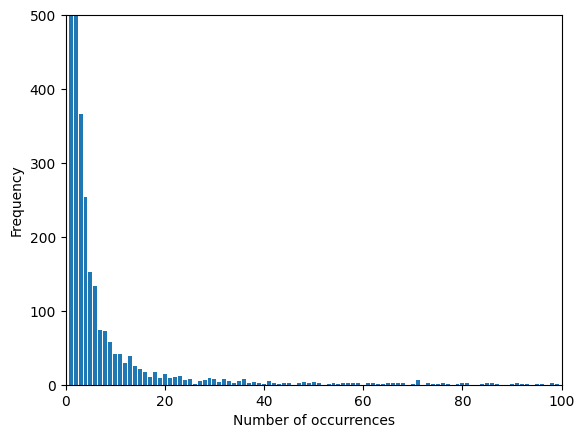

In [ ]:
hist_of_each_label(df, 0)

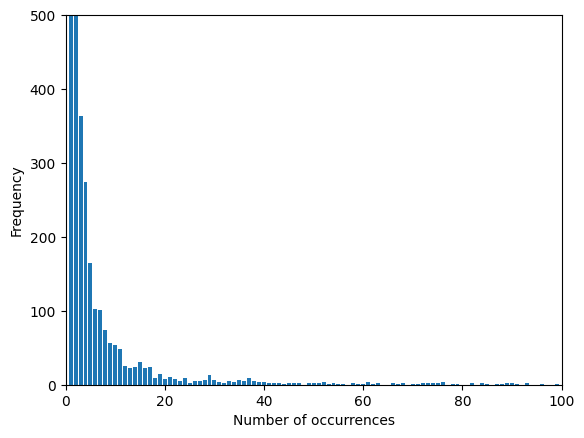

In [ ]:
hist_of_each_label(df, 1)

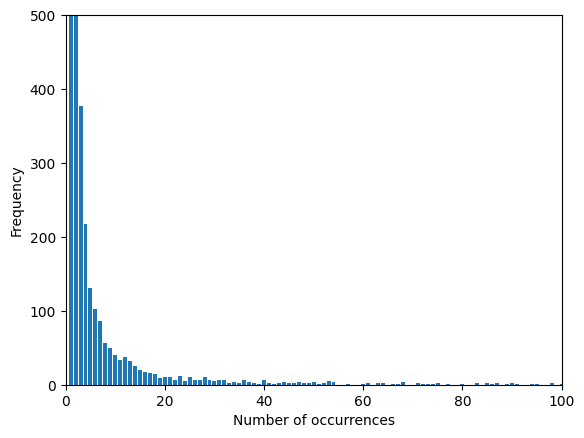

In [ ]:
hist_of_each_label(df, 2)

# **Get files**

In [122]:
!zip -r "/content/data.zip" "/content/data"
!zip -r "/content/stats.zip" "/content/stats"

  adding: content/data/ (stored 0%)
  adding: content/data/sentencebroken/ (stored 0%)
  adding: content/data/sentencebroken/sentencebroken.csv (deflated 83%)
  adding: content/data/clean/ (stored 0%)
  adding: content/data/clean/cleandata.csv (deflated 68%)
  adding: content/data/raw/ (stored 0%)
  adding: content/data/raw/rawdata.csv (deflated 68%)
  adding: content/data/wordbroken/ (stored 0%)
  adding: content/data/wordbroken/wordbroken.csv (deflated 72%)
  adding: content/stats/ (stored 0%)
  adding: content/stats/df_f.csv (deflated 30%)
  adding: content/stats/df_b.csv (stored 0%)
  adding: content/stats/df_h.csv (deflated 47%)
  adding: content/stats/df_c.csv (stored 0%)
  adding: content/stats/df_a.csv (stored 0%)
  adding: content/stats/df_g.csv (deflated 41%)
  adding: content/stats/df_e.csv (deflated 8%)
  adding: content/stats/df_d.csv (deflated 3%)
